In [65]:
import os
from skimage import io, color, exposure
from skimage.transform import resize
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 

In [66]:
test_normal_dir = "../input/test/NORMAL"
test_pneumonia_dir = "../input/test/PNEUMONIA"
train_normal_dir = "../input/train/NORMAL"
train_pneumonia_dir = "../input/train/PNEUMONIA"
val_normal_dir = "../input/val/NORMAL"
val_pneumonia_dir = "../input/val/PNEUMONIA"
full_url = np.vectorize(lambda url,prev_url: prev_url+"/"+url)
test_normal_data = pd.DataFrame(full_url(np.array(os.listdir(test_normal_dir)),test_normal_dir), columns=["image_dir"])
test_pneumonia_data = pd.DataFrame(full_url(np.array(os.listdir(test_pneumonia_dir)),test_pneumonia_dir), columns=["image_dir"])
train_normal_data = pd.DataFrame(full_url(np.array(os.listdir(train_normal_dir)),train_normal_dir), columns=["image_dir"])
train_pneumonia_data = pd.DataFrame(full_url(np.array(os.listdir(train_pneumonia_dir)),train_pneumonia_dir), columns=["image_dir"])
val_normal_data = pd.DataFrame(full_url(np.array(os.listdir(val_normal_dir)),val_normal_dir), columns=["image_dir"])
val_pneumonia_data = pd.DataFrame(full_url(np.array(os.listdir(val_pneumonia_dir)),val_pneumonia_dir), columns=["image_dir"])
test_normal_data["class"] = "NORMAL"
test_pneumonia_data["class"] = "PNEUMONIA"
train_normal_data["class"] = "NORMAL"
train_pneumonia_data["class"] = "PNEUMONIA"
val_normal_data["class"] = "NORMAL"
val_pneumonia_data["class"] = "PNEUMONIA"
test_data = test_normal_data.append(test_pneumonia_data)
train_data = train_normal_data.append(train_pneumonia_data)
val_data = val_normal_data.append(val_pneumonia_data)

In [23]:
pd.get_dummies(val_data["class"])["PNEUMONIA"].values

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [3]:
print("Training data size",train_data.shape)
print("Test data size",test_data.shape)
print("Val data size",val_data.shape)

Training data size (5216, 2)
Test data size (624, 2)
Val data size (16, 2)


In [4]:
# train clases sizes
pd.DataFrame(train_data['class'].value_counts())

,class
PNEUNOMIA,3875
NORMAL,1341


In [10]:
pd.DataFrame(train_data['class'].value_counts()).values[0]/train_data.shape[0]

array([0.74290644])

In [99]:
(test_normal_data.shape[0]+train_normal_data.shape[0])/(test_data.shape[0]+train_data.shape[0])

0.2696917808219178

In [5]:
# test clases sizes
pd.DataFrame(test_data['class'].value_counts())

,class
PNEUNOMIA,390
NORMAL,234


In [100]:
pd.DataFrame(test_data['class'].value_counts()).values[0]/test_data.shape[0]

array([0.625])

In [6]:
# val clases sizes
pd.DataFrame(val_data['class'].value_counts())

,class
NORMAL,8
PNEUNOMIA,8


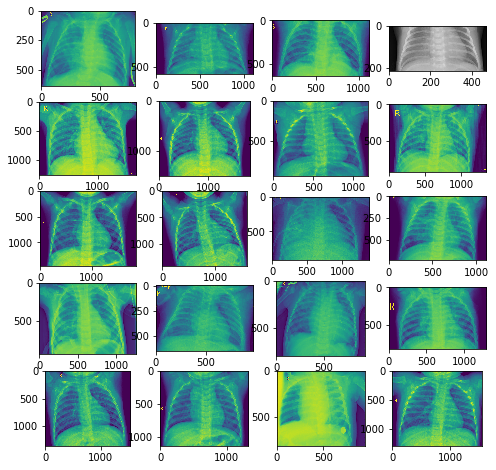

In [7]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
sample = train_data.sample(21)["image_dir"].values
for i in range(1, columns*rows +1):
    img = io.imread(sample[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

array(['../input/train/PNEUMONIA/person415_virus_847.jpeg',
       '../input/train/PNEUMONIA/person427_virus_875.jpeg',
       '../input/train/PNEUMONIA/person266_bacteria_1249.jpeg',
       '../input/train/PNEUMONIA/person576_virus_1120.jpeg',
       '../input/train/PNEUMONIA/person1250_bacteria_3207.jpeg',
       '../input/train/PNEUMONIA/person438_bacteria_1893.jpeg',
       '../input/train/PNEUMONIA/person60_bacteria_285.jpeg',
       '../input/train/PNEUMONIA/person988_virus_1666.jpeg',
       '../input/train/PNEUMONIA/person1108_virus_1833.jpeg',
       '../input/train/PNEUMONIA/person1216_virus_2062.jpeg',
       '../input/train/PNEUMONIA/person480_bacteria_2039.jpeg',
       '../input/train/PNEUMONIA/person1524_bacteria_3984.jpeg',
       '../input/train/PNEUMONIA/person895_bacteria_2820.jpeg',
       '../input/train/PNEUMONIA/person769_bacteria_2673.jpeg',
       '../input/train/PNEUMONIA/person1168_bacteria_3115.jpeg',
       '../input/train/PNEUMONIA/person507_bacteria_2141.

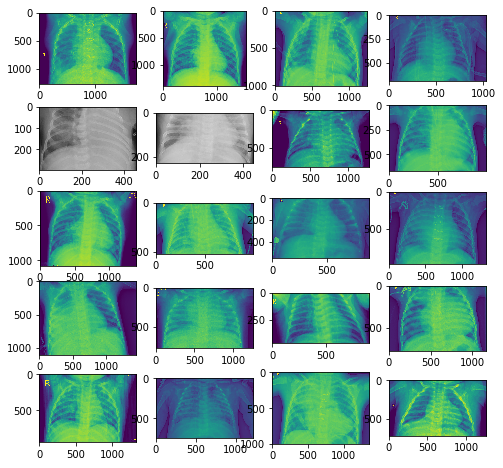

In [66]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
sample = train_data[train_data["class"] == "PNEUMONIA"].sample(20)["image_dir"].values
for i in range(1, columns*rows +1):
    img = io.imread(sample[i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

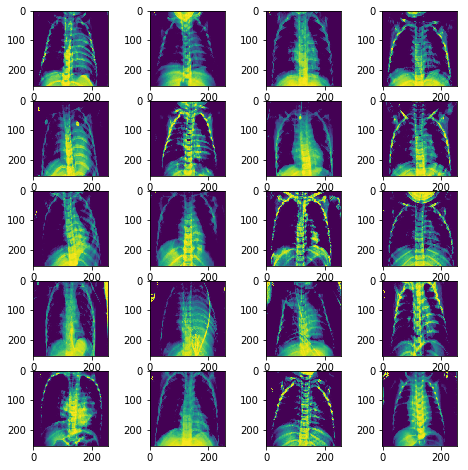

In [68]:
train_normal_dir = "../input/preprocessed-normalized/train/NORMAL"
train_pneumonia_dir = "../input/preprocessed-normalized/train/PNEUMONIA"
full_url = np.vectorize(lambda url,prev_url: prev_url+"/"+url)
train_normal_data = pd.DataFrame(full_url(np.array(os.listdir(train_normal_dir)),train_normal_dir), columns=["image_dir"])
train_pneumonia_data = pd.DataFrame(full_url(np.array(os.listdir(train_pneumonia_dir)),train_pneumonia_dir), columns=["image_dir"])
train_normal_data["class"] = "NORMAL"
train_pneumonia_data["class"] = "PNEUMONIA"
train_data_normalized = train_normal_data.append(train_pneumonia_data)

# preprocessed previsualization

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
sample = train_data_normalized.sample(21)["image_dir"].values
for i in range(1, columns*rows +1):
    image = io.imread(sample[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
plt.show()